In [1]:
#Importing required libraries.
from keras.models import Sequential
# To initialize neural network
from keras.layers import Convolution2D
# Images are two dimensional, concolution step
from keras.layers import MaxPooling2D
# Pooling step
from keras.layers import Flatten
# Convert pools feature map into this large feature vector
from keras.layers import Dense
#To add fully connected layers
import tensorflow as tf

In [2]:
#Initializing the CNN
#There is also a graph option but we'll use sequential ANN Model
classifier = Sequential()

#step 1 - Convolution
#creating the feature map by using feature detector from ınput image

classifier.add( Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))
#32 Feature maps&detetctors uses 3 by 3 matrices, we can put 128 in the powerful machines


In [3]:
#step -2 Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

#second convolution and pooling steps.
classifier.add( Convolution2D(32,3,3, activation='relu'))

classifier.add(MaxPooling2D(pool_size = (2,2)))


In [4]:
#step -3 Flattening
classifier.add(Flatten())

In [5]:
#step-4 Full connection step
classifier.add(Dense(activation = "relu", units=256))
classifier.add(Dense(activation = "sigmoid", units=1))
#binary outcome

In [6]:
#compiling the cnn

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])


In [7]:
#Fitting to CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/Users/rakshitbatra/Desktop/Covid-19_Detection/chest_xray/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        '/Users/rakshitbatra/Desktop/Covid-19_Detection/chest_xray/test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

results=classifier.fit(
        training_set,
        validation_data=test_set,
        steps_per_epoch=50,
        epochs=60,
        validation_steps=10)

Found 5518 images belonging to 2 classes.
Found 820 images belonging to 2 classes.
Epoch 1/60
50/50 [==============================] - 23s 443ms/step - loss: 0.6025 - accuracy: 0.7118 - val_loss: 0.6348 - val_accuracy: 0.6719
Epoch 2/60
50/50 [==============================] - 22s 451ms/step - loss: 0.5732 - accuracy: 0.7337 - val_loss: 0.5806 - val_accuracy: 0.7188
Epoch 3/60
50/50 [==============================] - 23s 470ms/step - loss: 0.5426 - accuracy: 0.7434 - val_loss: 0.5929 - val_accuracy: 0.6938
Epoch 4/60
50/50 [==============================] - 22s 438ms/step - loss: 0.5069 - accuracy: 0.7725 - val_loss: 0.5331 - val_accuracy: 0.7188
Epoch 5/60
50/50 [==============================] - 22s 450ms/step - loss: 0.4835 - accuracy: 0.7825 - val_loss: 0.4987 - val_accuracy: 0.7781
Epoch 6/60
50/50 [==============================] - 21s 427ms/step - loss: 0.4448 - accuracy: 0.8044 - val_loss: 0.4444 - val_accuracy: 0.7719
Epoch 7/60
50/50 [==============================] - 22s 434

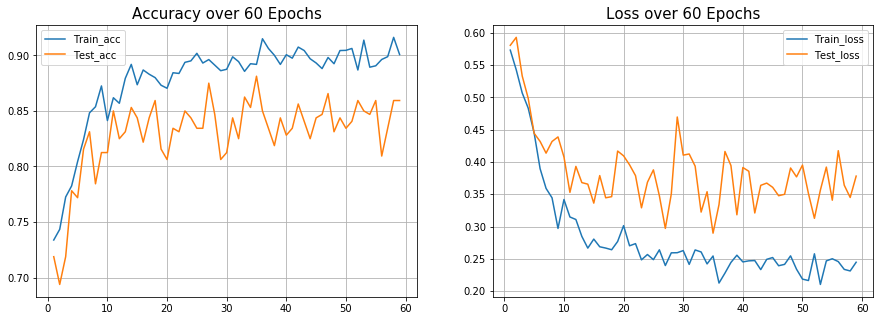

In [8]:
import matplotlib.pyplot as plt
def plot_acc_loss(results, epochs):
 acc = results.history['accuracy']
 loss = results.history['loss']
 val_acc = results.history['val_accuracy']
 val_loss = results.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over ' + str(epochs) +  ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(results, 60)

In [14]:
# Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/Users/rakshitbatra/Desktop/Covid-19_Detection/chest_xray/single_covid_19/covid19.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(training_set.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


Populating the interactive namespace from numpy and matplotlib


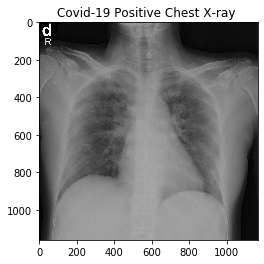

In [24]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('/Users/rakshitbatra/Desktop/Covid-19_Detection/chest_xray/single_covid_19/covid19.jpg')
imgplot = plt.imshow(img)
plt=plt.title('Covid-19 Positive Chest X-ray ')

In [35]:
if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'Covid Positive'
    
print("Neural Network's prediction is that the person is: "+ prediction)

Neural Network's prediction is that the person is: Covid Positive


In [36]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/Users/rakshitbatra/Desktop/Covid-19_Detection/chest_xray/single_covid_19/normal.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(training_set.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


Populating the interactive namespace from numpy and matplotlib


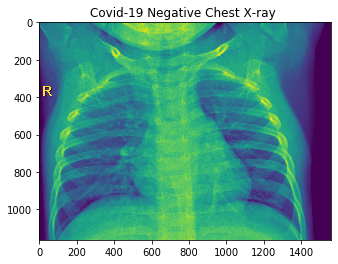

In [37]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('/Users/rakshitbatra/Desktop/Covid-19_Detection/chest_xray/single_covid_19/normal.jpeg')
imgplot = plt.imshow(img)
plt=plt.title('Covid-19 Negative Chest X-ray ')

In [39]:
if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'Covid Positive'
    
print("Neural Network's prediction is that the person is: "+ prediction)

Neural Network's prediction is that the person is: Covid Positive
